# All function can look inside functions.ipynb

In [45]:
%run -i functions.ipynb

## - Do this for your first time to change from text file to dataframe
## - Create "raw_pm2.5_df" as folder to keep those dataframe

In [46]:
city_list = ["Bangkok", "Chanthaburi", "Chiang Mai", "Kanchanaburi", "Khon Kaen", "Songkhla"]
for city in city_list:
    start = time()
    info_df, df = txt_to_df_with_shift_datetime("PM2.5_kaggle 2021/"+city+"/Train/"+"_".join(city.split(" "))+".txt")
    info_df.to_csv("raw_pm2.5_df/"+city+"_info.csv", index = False, encoding = "UTF-8")
    df.to_csv("raw_pm2.5_df/"+city+".csv", index = False, encoding = "UTF-8")
    end = time()
    elapsed_time = str(end-start)
    print(city + " Finish")
    print("Elapsed time = " + elapsed_time)

Bangkok Finish
Elapsed time = 111.22097325325012
Chanthaburi Finish
Elapsed time = 120.68661689758301
Chiang Mai Finish
Elapsed time = 119.92076206207275


KeyboardInterrupt: 

In [5]:
bangkok_df = pd.read_csv("raw_pm2.5_df/Bangkok.csv")
chanthaburi_df = pd.read_csv("raw_pm2.5_df/Chanthaburi.csv")
chiangmai_df = pd.read_csv("raw_pm2.5_df/Chiang Mai.csv")
Kanchanaburi_df = pd.read_csv("raw_pm2.5_df/Kanchanaburi.csv")
khonkaen_df = pd.read_csv("raw_pm2.5_df/Khon Kaen.csv")
songkhla_df = pd.read_csv("raw_pm2.5_df/Songkhla.csv")

In [6]:
bangkok_info_df = pd.read_csv("raw_pm2.5_df/Bangkok_info.csv")
chanthaburi_info_df = pd.read_csv("raw_pm2.5_df/Chanthaburi_info.csv")
chiangmai_info_df = pd.read_csv("raw_pm2.5_df/Chiang Mai_info.csv")
Kanchanaburi_info_df = pd.read_csv("raw_pm2.5_df/Kanchanaburi.csv")
khonkaen_info_df = pd.read_csv("raw_pm2.5_df/Khon Kaen_info.csv")
songkhla_info_df = pd.read_csv("raw_pm2.5_df/Songkhla_info.csv")

# Cleaning data
## 1) Bangkok
### 1.1) See information from DataFrame

In [7]:
bangkok_info_df

,Country,City,City (ASCII),Region,Region (ASCII),Population,Latitude,Longitude,Time Zone
0,Thailand,Bangkok,Bangkok,Bangkok,Bangkok,5104476,13.754,100.5014,Asia/Bangkok


In [8]:
bangkok_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         1 non-null      object 
 1   City            1 non-null      object 
 2   City (ASCII)    1 non-null      object 
 3   Region          1 non-null      object 
 4   Region (ASCII)  1 non-null      object 
 5   Population      1 non-null      int64  
 6   Latitude        1 non-null      float64
 7   Longitude       1 non-null      float64
 8   Time Zone       1 non-null      object 
dtypes: float64(2), int64(1), object(6)
memory usage: 200.0+ bytes


In [9]:
bangkok_df.head(3)

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective,datetime
0,2016,3,3,15,62.9,1.0,0,2016-03-03 15:00:00
1,2016,3,3,16,62.9,1.0,0,2016-03-03 16:00:00
2,2016,3,3,17,55.5,1.0,0,2016-03-03 17:00:00


In [10]:
bangkok_df.describe()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
count,24393.000000,24393.000000,24393.000000,24393.000000,24393.000000,24393.000000,24393.0
mean,2017.171730,6.556307,15.712909,11.519739,25.553921,0.521420,0.0
std,0.910734,3.412982,8.787384,6.910365,14.053030,0.499551,0.0
min,2016.000000,1.000000,1.000000,0.000000,2.500000,0.000000,0.0
25%,2016.000000,4.000000,8.000000,6.000000,15.400000,0.000000,0.0
50%,2017.000000,7.000000,16.000000,11.000000,21.900000,1.000000,0.0
75%,2018.000000,10.000000,23.000000,17.000000,32.200000,1.000000,0.0
max,2019.000000,12.000000,31.000000,23.000000,115.400000,1.000000,0.0


In [11]:
bangkok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24393 entries, 0 to 24392
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           24393 non-null  int64  
 1   Month          24393 non-null  int64  
 2   Day            24393 non-null  int64  
 3   UTC Hour       24393 non-null  int64  
 4   PM2.5          24393 non-null  float64
 5   PM10_mask      24393 non-null  float64
 6   Retrospective  24393 non-null  int64  
 7   datetime       24393 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


### 1.2) Check null value

In [12]:
check_null_all(bangkok_df)

Number of null values in each column:
Year             0
Month            0
Day              0
UTC Hour         0
PM2.5            0
PM10_mask        0
Retrospective    0
datetime         0
dtype: int64


### 1.3) Check any weird and oulier value
### Check datetime not out of range

In [13]:
x_bangkok = 3
eval("x_" + "bangkok")
exec("print(1)")

1


In [14]:
check_city_feature_unique(bangkok_df, ["Year", "Month", "Day", "UTC Hour"], "Bangkok")

------------------------------
Bangkok Year
[2016 2017 2018 2019]
------------------------------
Bangkok Month
[ 3  4  5  6  7  8  9 10 11 12  1  2]
------------------------------
Bangkok Day
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  1  2]
------------------------------
Bangkok UTC Hour
[15 16 17 18 19 20 21 22 23  0  2  3  4  5  6  7  8  9 10 11 12 13 14  1]
------------------------------


### See PM2.5 distribution

<AxesSubplot:title={'center':'PM2.5'}, ylabel='Frequency'>

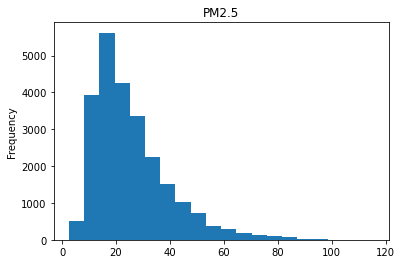

In [15]:
bangkok_df["PM2.5"].plot.hist(bins = 20, title = "PM2.5")

### See bangkok PM2.5 trend 2016-2019

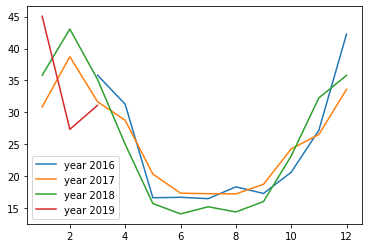

In [16]:
pm_trend_each_year(bangkok_df)

# Wind
## 1) Bangkok
### 1.1) See information from wind bangkok dataframe

In [17]:
wind_bangkok_df = pd.read_csv("PM2.5_kaggle 2021/Bangkok/Train/3H_wind_Bangkok.csv")
wind_bangkok_df.head(5)

,datetime,WindDir,Wind Speed(km/h),lat,long
0,2016-03-03 01:00:00,45,13,13.754,100.5014
1,2016-03-03 04:00:00,60,11,13.754,100.5014
2,2016-03-03 07:00:00,65,15,13.754,100.5014
3,2016-03-03 10:00:00,75,13,13.754,100.5014
4,2016-03-03 13:00:00,70,12,13.754,100.5014


In [18]:
wind_bangkok_df.describe()

,WindDir,Wind Speed(km/h),lat,long
count,8880.000000,8880.000000,8.880000e+03,8.880000e+03
mean,173.300676,19.887387,1.375400e+01,1.005014e+02
std,93.670420,12.254249,7.532590e-13,1.735243e-11
min,0.000000,0.000000,1.375400e+01,1.005014e+02
25%,80.000000,11.000000,1.375400e+01,1.005014e+02
50%,175.000000,17.000000,1.375400e+01,1.005014e+02
75%,265.000000,26.000000,1.375400e+01,1.005014e+02
max,360.000000,76.000000,1.375400e+01,1.005014e+02


In [19]:
wind_bangkok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          8880 non-null   object 
 1   WindDir           8880 non-null   int64  
 2   Wind Speed(km/h)  8880 non-null   int64  
 3   lat               8880 non-null   float64
 4   long              8880 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 347.0+ KB


### 1.2) Check null value

In [20]:
check_null_all(wind_bangkok_df)

Number of null values in each column:
datetime            0
WindDir             0
Wind Speed(km/h)    0
lat                 0
long                0
dtype: int64


### Convert datetime(string type) to datetime(datetime type)

In [21]:
wind_bangkok_df["datetime_tmp"] = wind_bangkok_df["datetime"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
wind_bangkok_df

,datetime,WindDir,Wind Speed(km/h),lat,long,datetime_tmp
0,2016-03-03 01:00:00,45,13,13.754,100.5014,2016-03-03 01:00:00
1,2016-03-03 04:00:00,60,11,13.754,100.5014,2016-03-03 04:00:00
2,2016-03-03 07:00:00,65,15,13.754,100.5014,2016-03-03 07:00:00
3,2016-03-03 10:00:00,75,13,13.754,100.5014,2016-03-03 10:00:00
4,2016-03-03 13:00:00,70,12,13.754,100.5014,2016-03-03 13:00:00
...,...,...,...,...,...,...
8875,2019-03-17 10:00:00,110,26,13.754,100.5014,2019-03-17 10:00:00
8876,2019-03-17 13:00:00,95,23,13.754,100.5014,2019-03-17 13:00:00
8877,2019-03-17 16:00:00,65,15,13.754,100.5014,2019-03-17 16:00:00
8878,2019-03-17 19:00:00,70,17,13.754,100.5014,2019-03-17 19:00:00


### extract each datetime as columns feature

In [22]:
wind_bangkok_df = extract_date_string(wind_bangkok_df)
wind_bangkok_df.drop(columns = ["datetime"], inplace = True)
wind_bangkok_df.rename(columns = {"datetime_tmp":"datetime"} , inplace = True)

In [23]:
wind_bangkok_df

,WindDir,Wind Speed(km/h),lat,long,datetime,Year,Month,Day,UTC Hour
0,45,13,13.754,100.5014,2016-03-03 01:00:00,2016,3,3,1
1,60,11,13.754,100.5014,2016-03-03 04:00:00,2016,3,3,4
2,65,15,13.754,100.5014,2016-03-03 07:00:00,2016,3,3,7
3,75,13,13.754,100.5014,2016-03-03 10:00:00,2016,3,3,10
4,70,12,13.754,100.5014,2016-03-03 13:00:00,2016,3,3,13
...,...,...,...,...,...,...,...,...,...
8875,110,26,13.754,100.5014,2019-03-17 10:00:00,2019,3,17,10
8876,95,23,13.754,100.5014,2019-03-17 13:00:00,2019,3,17,13
8877,65,15,13.754,100.5014,2019-03-17 16:00:00,2019,3,17,16
8878,70,17,13.754,100.5014,2019-03-17 19:00:00,2019,3,17,19


### 1.3) See trend each attribute

<AxesSubplot:title={'center':'Wind direction bangkok distribution 2016-2019'}, ylabel='Frequency'>

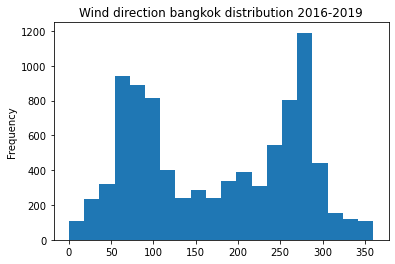

In [24]:
wind_bangkok_df["WindDir"].plot.hist(bins = 20, title = "Wind direction bangkok distribution 2016-2019")

### See bangkok wind trend

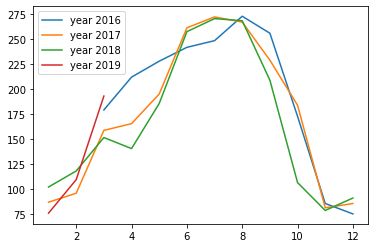

In [25]:
wind_direct_trend_each_year(wind_bangkok_df)

<AxesSubplot:title={'center':'Wind speed bangkok distribution 2016-2019'}, ylabel='Frequency'>

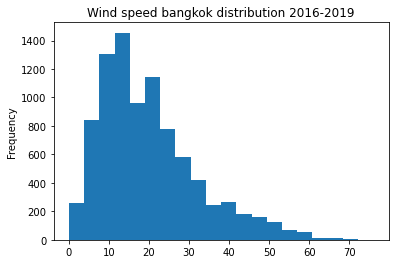

In [26]:
wind_bangkok_df["Wind Speed(km/h)"].plot.hist(bins = 20, title = "Wind speed bangkok distribution 2016-2019")

### See bangkok win speed trend

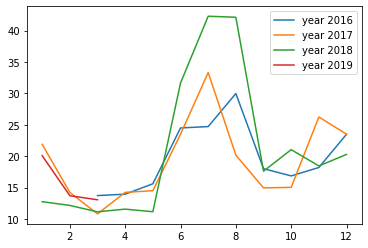

In [27]:
wind_speed_trend_each_year(wind_bangkok_df)

# Temperature

In [28]:
temp_bangkok_df = pd.read_csv("PM2.5_kaggle 2021/Bangkok/Train/3H_temperature_Bangkok.csv")

In [29]:
temp_bangkok_df.head()

,datetime,Temp(C),lat,long
0,2016-03-03 01:00:00,25.5,13.754,100.5014
1,2016-03-03 04:00:00,25.0,13.754,100.5014
2,2016-03-03 07:00:00,26.4,13.754,100.5014
3,2016-03-03 10:00:00,31.4,13.754,100.5014
4,2016-03-03 13:00:00,34.1,13.754,100.5014


In [30]:
temp_bangkok_df.describe()

,Temp(C),lat,long
count,8880.000000,8.880000e+03,8.880000e+03
mean,29.584167,1.375400e+01,1.005014e+02
std,2.835496,7.549942e-13,1.735243e-11
min,17.200000,1.375400e+01,1.005014e+02
25%,27.600000,1.375400e+01,1.005014e+02
50%,29.300000,1.375400e+01,1.005014e+02
75%,31.500000,1.375400e+01,1.005014e+02
max,38.500000,1.375400e+01,1.005014e+02


In [31]:
temp_bangkok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  8880 non-null   object 
 1   Temp(C)   8880 non-null   float64
 2   lat       8880 non-null   float64
 3   long      8880 non-null   float64
dtypes: float64(3), object(1)
memory usage: 277.6+ KB


### Check null value

In [32]:
check_null_all(temp_bangkok_df)

Number of null values in each column:
datetime    0
Temp(C)     0
lat         0
long        0
dtype: int64


In [33]:
temp_bangkok_df["datetime_temp"] = temp_bangkok_df["datetime"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
temp_bangkok_df = extract_date_string(temp_bangkok_df)
temp_bangkok_df.drop(columns = ["datetime"], inplace = True)
temp_bangkok_df.rename(columns = {"datetime_temp":"datetime"} , inplace = True)
temp_bangkok_df

,Temp(C),lat,long,datetime,Year,Month,Day,UTC Hour
0,25.5,13.754,100.5014,2016-03-03 01:00:00,2016,3,3,1
1,25.0,13.754,100.5014,2016-03-03 04:00:00,2016,3,3,4
2,26.4,13.754,100.5014,2016-03-03 07:00:00,2016,3,3,7
3,31.4,13.754,100.5014,2016-03-03 10:00:00,2016,3,3,10
4,34.1,13.754,100.5014,2016-03-03 13:00:00,2016,3,3,13
...,...,...,...,...,...,...,...,...
8875,32.1,13.754,100.5014,2019-03-17 10:00:00,2019,3,17,10
8876,33.4,13.754,100.5014,2019-03-17 13:00:00,2019,3,17,13
8877,34.6,13.754,100.5014,2019-03-17 16:00:00,2019,3,17,16
8878,31.3,13.754,100.5014,2019-03-17 19:00:00,2019,3,17,19


<AxesSubplot:title={'center':'Temperature bangkok distribution 2016-2019'}, ylabel='Frequency'>

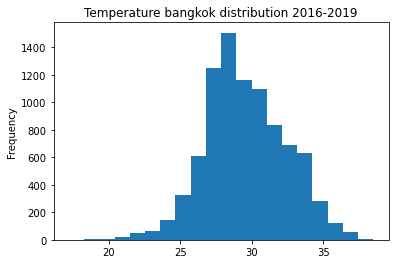

In [34]:
temp_bangkok_df["Temp(C)"].plot.hist(bins = 20, title = "Temperature bangkok distribution 2016-2019")

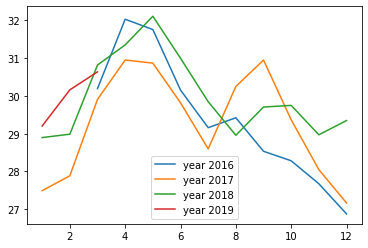

In [35]:
temp_trend_each_year(temp_bangkok_df)

# Hotspot

In [36]:
hotspot_bangkok_df = pd.read_csv("PM2.5_kaggle 2021/Fire hotspot/fire_archive_M6_163549.csv")

In [37]:
hotspot_bangkok_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-0.8235,133.0450,302.8,1.1,1.0,2019-12-01,130,Terra,MODIS,33,6.03,280.6,2.5,D,0
1,-0.8162,133.0429,312.8,1.1,1.0,2019-12-01,130,Terra,MODIS,65,6.03,285.2,8.8,D,0
2,-12.3706,131.5872,329.4,1.0,1.0,2019-12-01,133,Terra,MODIS,30,6.03,298.1,14.8,D,0
3,-12.3665,131.5595,331.9,1.0,1.0,2019-12-01,133,Terra,MODIS,58,6.03,305.5,16.9,D,0
4,-12.3651,131.5503,331.6,1.0,1.0,2019-12-01,133,Terra,MODIS,48,6.03,304.9,16.0,D,0


In [38]:
hotspot_bangkok_df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,372774.000000,372774.000000,372774.000000,372774.000000,372774.000000,372774.000000,372774.000000,3.727740e+05,372774.000000,372774.000000,372774.000000
mean,16.856427,104.773138,324.216261,1.484655,1.171365,664.896326,64.271776,6.030000e+00,300.546489,34.291025,0.120269
std,14.189797,14.575495,15.945307,0.712197,0.222788,385.838131,20.364808,8.948410e-12,7.810396,82.350640,0.493997
min,-19.349300,71.300100,300.000000,1.000000,1.000000,33.000000,0.000000,6.030000e+00,264.600000,0.000000,0.000000
25%,13.521400,97.331300,314.700000,1.000000,1.000000,438.000000,52.000000,6.030000e+00,295.400000,9.300000,0.000000
50%,19.197700,102.897100,322.000000,1.200000,1.100000,619.000000,66.000000,6.030000e+00,301.200000,15.600000,0.000000
75%,23.341275,111.714925,329.900000,1.600000,1.300000,702.000000,78.000000,6.030000e+00,305.600000,31.500000,0.000000
max,45.199900,136.499900,504.600000,4.800000,2.000000,2157.000000,100.000000,6.030000e+00,400.100000,7973.000000,3.000000


In [39]:
hotspot_bangkok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372774 entries, 0 to 372773
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    372774 non-null  float64
 1   longitude   372774 non-null  float64
 2   brightness  372774 non-null  float64
 3   scan        372774 non-null  float64
 4   track       372774 non-null  float64
 5   acq_date    372774 non-null  object 
 6   acq_time    372774 non-null  int64  
 7   satellite   372774 non-null  object 
 8   instrument  372774 non-null  object 
 9   confidence  372774 non-null  int64  
 10  version     372774 non-null  float64
 11  bright_t31  372774 non-null  float64
 12  frp         372774 non-null  float64
 13  daynight    372774 non-null  object 
 14  type        372774 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 42.7+ MB


### Check null all

In [40]:
check_null_all(hotspot_bangkok_df)

Number of null values in each column:
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64



### Work around datetime

In [41]:
hotspot_bangkok_df = hotspot_convert_datetime(hotspot_bangkok_df)
hotspot_bangkok_df.head(3)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,type,acq_time_str,Year,Month,Day,UTC Hour,UTC Min,datetime
0,-0.8235,133.0450,302.8,1.1,1.0,2019-12-01,130,Terra,MODIS,33,...,2.5,D,0,0130,2019,12,1,8,30,2019-12-01 08:30:00
1,-0.8162,133.0429,312.8,1.1,1.0,2019-12-01,130,Terra,MODIS,65,...,8.8,D,0,0130,2019,12,1,8,30,2019-12-01 08:30:00
2,-12.3706,131.5872,329.4,1.0,1.0,2019-12-01,133,Terra,MODIS,30,...,14.8,D,0,0133,2019,12,1,8,33,2019-12-01 08:33:00


### some columns is not nessesary now => datetime already provide enough data no need acq_date, acq_time

In [42]:
hotspot_bangkok_df.drop(columns = ["acq_time","acq_date"], inplace = True)
hotspot_bangkok_df

,latitude,longitude,brightness,scan,track,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_time_str,Year,Month,Day,UTC Hour,UTC Min,datetime
0,-0.8235,133.0450,302.8,1.1,1.0,Terra,MODIS,33,6.03,280.6,2.5,D,0,0130,2019,12,1,8,30,2019-12-01 08:30:00
1,-0.8162,133.0429,312.8,1.1,1.0,Terra,MODIS,65,6.03,285.2,8.8,D,0,0130,2019,12,1,8,30,2019-12-01 08:30:00
2,-12.3706,131.5872,329.4,1.0,1.0,Terra,MODIS,30,6.03,298.1,14.8,D,0,0133,2019,12,1,8,33,2019-12-01 08:33:00
3,-12.3665,131.5595,331.9,1.0,1.0,Terra,MODIS,58,6.03,305.5,16.9,D,0,0133,2019,12,1,8,33,2019-12-01 08:33:00
4,-12.3651,131.5503,331.6,1.0,1.0,Terra,MODIS,48,6.03,304.9,16.0,D,0,0133,2019,12,1,8,33,2019-12-01 08:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372769,40.6052,109.6865,304.4,1.0,1.0,Aqua,MODIS,60,6.03,290.9,6.3,N,2,1847,2020,8,1,1,47,2020-08-01 01:47:00
372770,39.4083,110.6341,300.0,1.1,1.0,Aqua,MODIS,5,6.03,284.1,5.1,N,0,1847,2020,8,1,1,47,2020-08-01 01:47:00
372771,39.3870,110.5909,300.1,1.1,1.0,Aqua,MODIS,15,6.03,285.9,4.9,N,0,1847,2020,8,1,1,47,2020-08-01 01:47:00
372772,44.7340,90.2537,304.1,1.3,1.1,Aqua,MODIS,58,6.03,287.6,11.0,N,2,2025,2020,8,1,3,25,2020-08-01 03:25:00


### Work around each feature
### 1) brightness

<AxesSubplot:title={'center':'brightness bangkok distribution 2016-2019'}, ylabel='Frequency'>

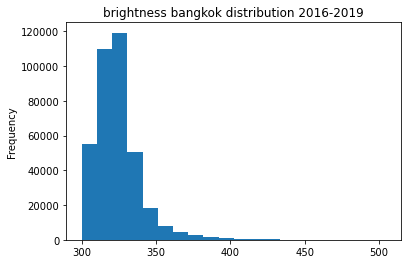

In [43]:
hotspot_bangkok_df["brightness"].plot.hist(bins = 20, title = "brightness bangkok distribution 2016-2019")

In [44]:
hotspot_trend_each_year(hotspot_bangkok_df, "brightness")

KeyError: 'feature'

# Submission Example

In [ ]:
pd.read_excel("PM2.5_kaggle 2021/submission_example_Chanthaburi_3days.xlsx").head(20)

In [ ]:
pd.read_csv("PM2.5_kaggle 2021/submission_example_Kaggle.csv").head(20)